In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skp
from scipy import linalg as LA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Load the desire dataset
X = np.load("Dataset/olivetti_faces.npy")   
Y = np.load("Dataset/olivetti_faces_target.npy")

#Spliting the dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [3]:
X_train.shape

(300, 64, 64)

In [4]:
X_test.shape

(100, 64, 64)

In [5]:
Y_train.shape

(300,)

In [6]:
Y_test.shape

(100,)

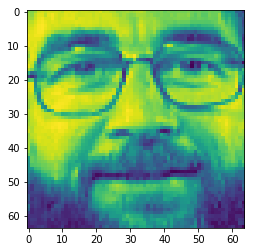

In [7]:
plt.imshow(X_train[0].reshape(64,64))   #face image of 1st person in the train data 

In [8]:
#Reshaping the train and test data from 3D to 2D
X_train = X_train.flatten().reshape(300,4096)
X_test = X_test.flatten().reshape(100,4096)

#calculating the mean of train and test data
Xtrain_mean =np.mean(X_train,axis=0)
Xtest_mean = np.mean(X_test,axis=0)

In [9]:
#Standardization of train data for geting zero mean and all the variables are transformed to one scale
scaler=skp.StandardScaler(copy=False).fit(X_train)  
scaler.transform(X_train)

array([[ 1.6739062 ,  1.403581  ,  1.3280972 , ..., -0.9118203 ,
        -0.7393536 , -1.1088604 ],
       [-1.259077  , -0.73024124,  0.4412915 , ...,  0.08273552,
         0.25420338,  0.34977284],
       [-1.5072526 , -1.7217141 , -1.8390663 , ...,  0.6881174 ,
         0.7178632 ,  0.708821  ],
       ...,
       [ 0.7940113 ,  0.7785219 ,  0.5890924 , ...,  1.3367409 ,
        -0.80559075, -0.77225274],
       [ 0.11716893,  0.15346284,  0.06123195, ..., -0.13347231,
         0.67370516,  1.0005475 ],
       [ 1.0647482 ,  1.1880432 ,  1.0958388 , ..., -0.80371636,
        -0.58480024, -0.74981225]], dtype=float32)

In [10]:
Xtrain_mean.shape

(4096,)

In [11]:
Xtest_mean.shape

(4096,)

In [12]:
#Standardization of test data for getting zero mean 
scaler=skp.StandardScaler(copy=False).fit(X_test)
scaler.transform(X_test)

array([[ 0.62622297,  0.46168232,  0.30880898, ...,  1.8455914 ,
         1.7806572 ,  1.7571034 ],
       [ 1.4663075 ,  1.257686  ,  1.023444  , ..., -0.90902257,
        -0.8957537 , -0.81534296],
       [-0.57389784, -1.0393534 , -1.5752292 , ...,  0.05626959,
        -0.00361676, -0.05585875],
       ...,
       [ 0.7222325 ,  0.4161963 ,  0.3954313 , ..., -0.15562393,
        -0.26884657, -0.15385675],
       [-0.5018904 , -1.0620962 , -0.16761447, ...,  0.45651254,
         1.5395392 ,  1.8061025 ],
       [-0.3098712 , -0.81192374, -1.5102623 , ..., -0.20271128,
        -0.14828761, -0.0803583 ]], dtype=float32)

In [13]:
#Covariance - for finding if there any realtion exist between the features or not 
cov_train = np.cov(X_train.T)

In [14]:
cov_train[0]

array([ 1.00334394,  0.94649249,  0.81430276, ..., -0.13249098,
       -0.14228944, -0.11215588])

In [15]:
cov_train.shape

(4096, 4096)

In [16]:
#Calulating Eigenvalues and Eigenvectors 
#Eigenvectors of a covariance matrix are actually the direction of matrix where there is maximum variation called as PRINCIPAL COMPONENT
eig_values,eig_vectors = LA.eig(cov_train)

In [17]:
eig_values[0]

(1063.6772251997315+0j)

In [18]:
eig_vectors[0]

array([-1.60395520e-03+0.j        ,  2.10570094e-02+0.j        ,
        8.67287656e-04+0.j        , ..., -4.49743913e-05+0.00096251j,
       -4.49743913e-05-0.00096251j, -1.20088246e-03+0.j        ])

In [19]:
#Eig_pairs is the ranking of Eigenvalues from highest to lowest which gives us the order of PRINCIPAL COMPONENT
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [20]:

eig_pairs[0][0]

1063.6772251997315

In [21]:
Threshold = 95   #threshold upon which we can decide whether to keep or discard each feature vector.
total = sum(eig_values)

# % variance accounted by each component
var_exp = [(i / total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
    if percentage > Threshold:                 
        num_vec_to_keep = index + 1
        break 

# Froming the FEATURE VECTOR        
num_features = X_train.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))
    pca_data = X_train @ proj_mat  

In [22]:
pca_data.shape

(300, 107)

In [23]:
pca_data=pca_data.real
pca_data

array([[ -1.15254114,  15.36058684,   1.57835463, ...,   0.30456115,
         -2.55025207,   2.21157194],
       [  2.44721066,  19.95977588,  -2.72995787, ...,  -1.76328959,
         -0.64821816,   0.42835203],
       [-22.50957303, -23.4269467 ,  19.82823436, ...,   0.60157624,
          2.46964053,  -2.07024134],
       ...,
       [-29.15932973,  -2.65736163, -16.31178044, ...,  -1.35999035,
          1.11301502,  -1.97746226],
       [ 66.62167703,   5.90876757, -22.77292503, ...,  -0.98838159,
          1.58418476,   1.27924876],
       [-26.39905303,   5.09560684,  30.43029413, ...,   0.55973344,
          0.26170864,  -3.08436544]])

In [24]:
Threshold = 95
total = sum(eig_values)
var_exp = [(i / total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
    if percentage > Threshold:
        num_vec_to_keep = index + 1
        break 
            
num_features = X_test.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))
    test_pca_data = X_test @ proj_mat

In [25]:
test_pca_data.shape

(100, 107)

In [26]:
test_pca_data=test_pca_data.real

In [ ]:
# Feeding these Feature vactors into any Machine Learning model(Logistic Regression) 

In [27]:
model = LogisticRegression()
print(model.fit(pca_data,Y_train))

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [28]:
train_predicted=model.predict(pca_data)
print(classification_report(Y_train,train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         8
          17       1.00    

In [29]:
prediction=model.predict(test_pca_data)
score = model.score(test_pca_data, Y_test)
print(score)

0.94


In [30]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         4
           2       0.50      0.50      0.50         2
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       1.00    

In [31]:
print(confusion_matrix(Y_test,prediction))

[[1 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 3]]
